In [19]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
image_dir = Path('C:/Users/hrishikesh/Desktop/deepdog/tr_images')

In [26]:
image_dir

WindowsPath('C:/Users/hrishikesh/Desktop/deepdog/tr_images')

In [27]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

# filepaths = pd.Series(filepaths, name='Filepath').astype(str)
# labels = pd.Series(labels, name='Label')

# images = pd.concat([filepaths, labels], axis=1)

In [49]:
[os.path.abspath(filepaths[0]) for filepaths[0] in filepaths ]

['C:\\Users\\hrishikesh\\Desktop\\deepdog\\tr_images\\Afghan_hound\\n02088094_1007.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\deepdog\\tr_images\\Afghan_hound\\n02088094_1023.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\deepdog\\tr_images\\Afghan_hound\\n02088094_10263.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\deepdog\\tr_images\\Afghan_hound\\n02088094_10715.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\deepdog\\tr_images\\Afghan_hound\\n02088094_10822.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\deepdog\\tr_images\\Afghan_hound\\n02088094_10832.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\deepdog\\tr_images\\Afghan_hound\\n02088094_10982.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\deepdog\\tr_images\\Afghan_hound\\n02088094_11006.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\deepdog\\tr_images\\Afghan_hound\\n02088094_11172.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\deepdog\\tr_images\\Afghan_hound\\n02088094_11182.jpg',
 'C:\\Users\\hrishikesh\\Desktop\\deepdog\\tr_images\\Afghan_hound\\n02088094_1126.jpg',
 'C:\\Users\\

In [5]:
images.Label.value_counts()

Pomeranian             219
Shih-Tzu               214
Afghan_hound           203
Pug                    200
Beagle                 195
Siberian_husky         192
Japanese_spaniel       185
Labrador_retriever     171
Saint_Bernard          170
African_hunting_dog    169
Great_Dane             156
German_shepherd        152
Rottweiler             152
Chihuahua              152
Tibetan_mastiff        152
Toy_poodle             151
Golden_retriever       150
Doberman               150
Bulldog                101
Dalmation               64
Name: Label, dtype: int64

In [6]:
images

Filepath         Label
0     C:\Users\hrishikesh\Desktop\deepdog\tr_images\...  Afghan_hound
1     C:\Users\hrishikesh\Desktop\deepdog\tr_images\...  Afghan_hound
2     C:\Users\hrishikesh\Desktop\deepdog\tr_images\...  Afghan_hound
3     C:\Users\hrishikesh\Desktop\deepdog\tr_images\...  Afghan_hound
4     C:\Users\hrishikesh\Desktop\deepdog\tr_images\...  Afghan_hound
...                                                 ...           ...
3293  C:\Users\hrishikesh\Desktop\deepdog\tr_images\...    Toy_poodle
3294  C:\Users\hrishikesh\Desktop\deepdog\tr_images\...    Toy_poodle
3295  C:\Users\hrishikesh\Desktop\deepdog\tr_images\...    Toy_poodle
3296  C:\Users\hrishikesh\Desktop\deepdog\tr_images\...    Toy_poodle
3297  C:\Users\hrishikesh\Desktop\deepdog\tr_images\...    Toy_poodle

[3298 rows x 2 columns]

In [7]:
train_df, test_df = train_test_split(images, train_size=0.7, shuffle=True, random_state=1)

In [8]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [9]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1847 validated image filenames belonging to 20 classes.
Found 461 validated image filenames belonging to 20 classes.
Found 990 validated image filenames belonging to 20 classes.


In [10]:
pretrained_model = tf.keras.applications.resnet50.ResNet50(
                    input_shape=(224, 224, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

pretrained_model.trainable = False

In [14]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(50, activation='relu')(x)
outputs = tf.keras.layers.Dense(20, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history = model.fit(train_images,validation_data=val_images,epochs=25,
    callbacks=[callbacks])

Epoch 1/25
58/58 [==============================] - 96s 2s/step - loss: 1.1799 - accuracy: 0.6854 - val_loss: 0.4276 - val_accuracy: 0.9002
Epoch 2/25
58/58 [==============================] - 99s 2s/step - loss: 0.2059 - accuracy: 0.9469 - val_loss: 0.3934 - val_accuracy: 0.8807
Epoch 3/25
58/58 [==============================] - 98s 2s/step - loss: 0.0911 - accuracy: 0.9746 - val_loss: 0.3306 - val_accuracy: 0.9219
Epoch 4/25
58/58 [==============================] - 97s 2s/step - loss: 0.0413 - accuracy: 0.9940 - val_loss: 0.2766 - val_accuracy: 0.9176
Epoch 5/25
58/58 [==============================] - 102s 2s/step - loss: 0.0200 - accuracy: 0.9989 - val_loss: 0.3410 - val_accuracy: 0.9111
Epoch 6/25
58/58 [==============================] - 103s 2s/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.2798 - val_accuracy: 0.9197
Epoch 7/25
58/58 [==============================] - 105s 2s/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.2760 - val_accuracy: 0.9241
Epoch 8/25
58/58 

In [21]:
results = model.evaluate(test_images, verbose=0)
print(results)
print(f"Test Accuracy: {np.round(results[1] * 100,2)}%")

[0.2471955567598343, 0.9292929172515869]
Test Accuracy: 92.93%


In [22]:
predictions = np.argmax(model.predict(test_images), axis=1)
matrix = confusion_matrix(test_images.labels, predictions)
report= classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

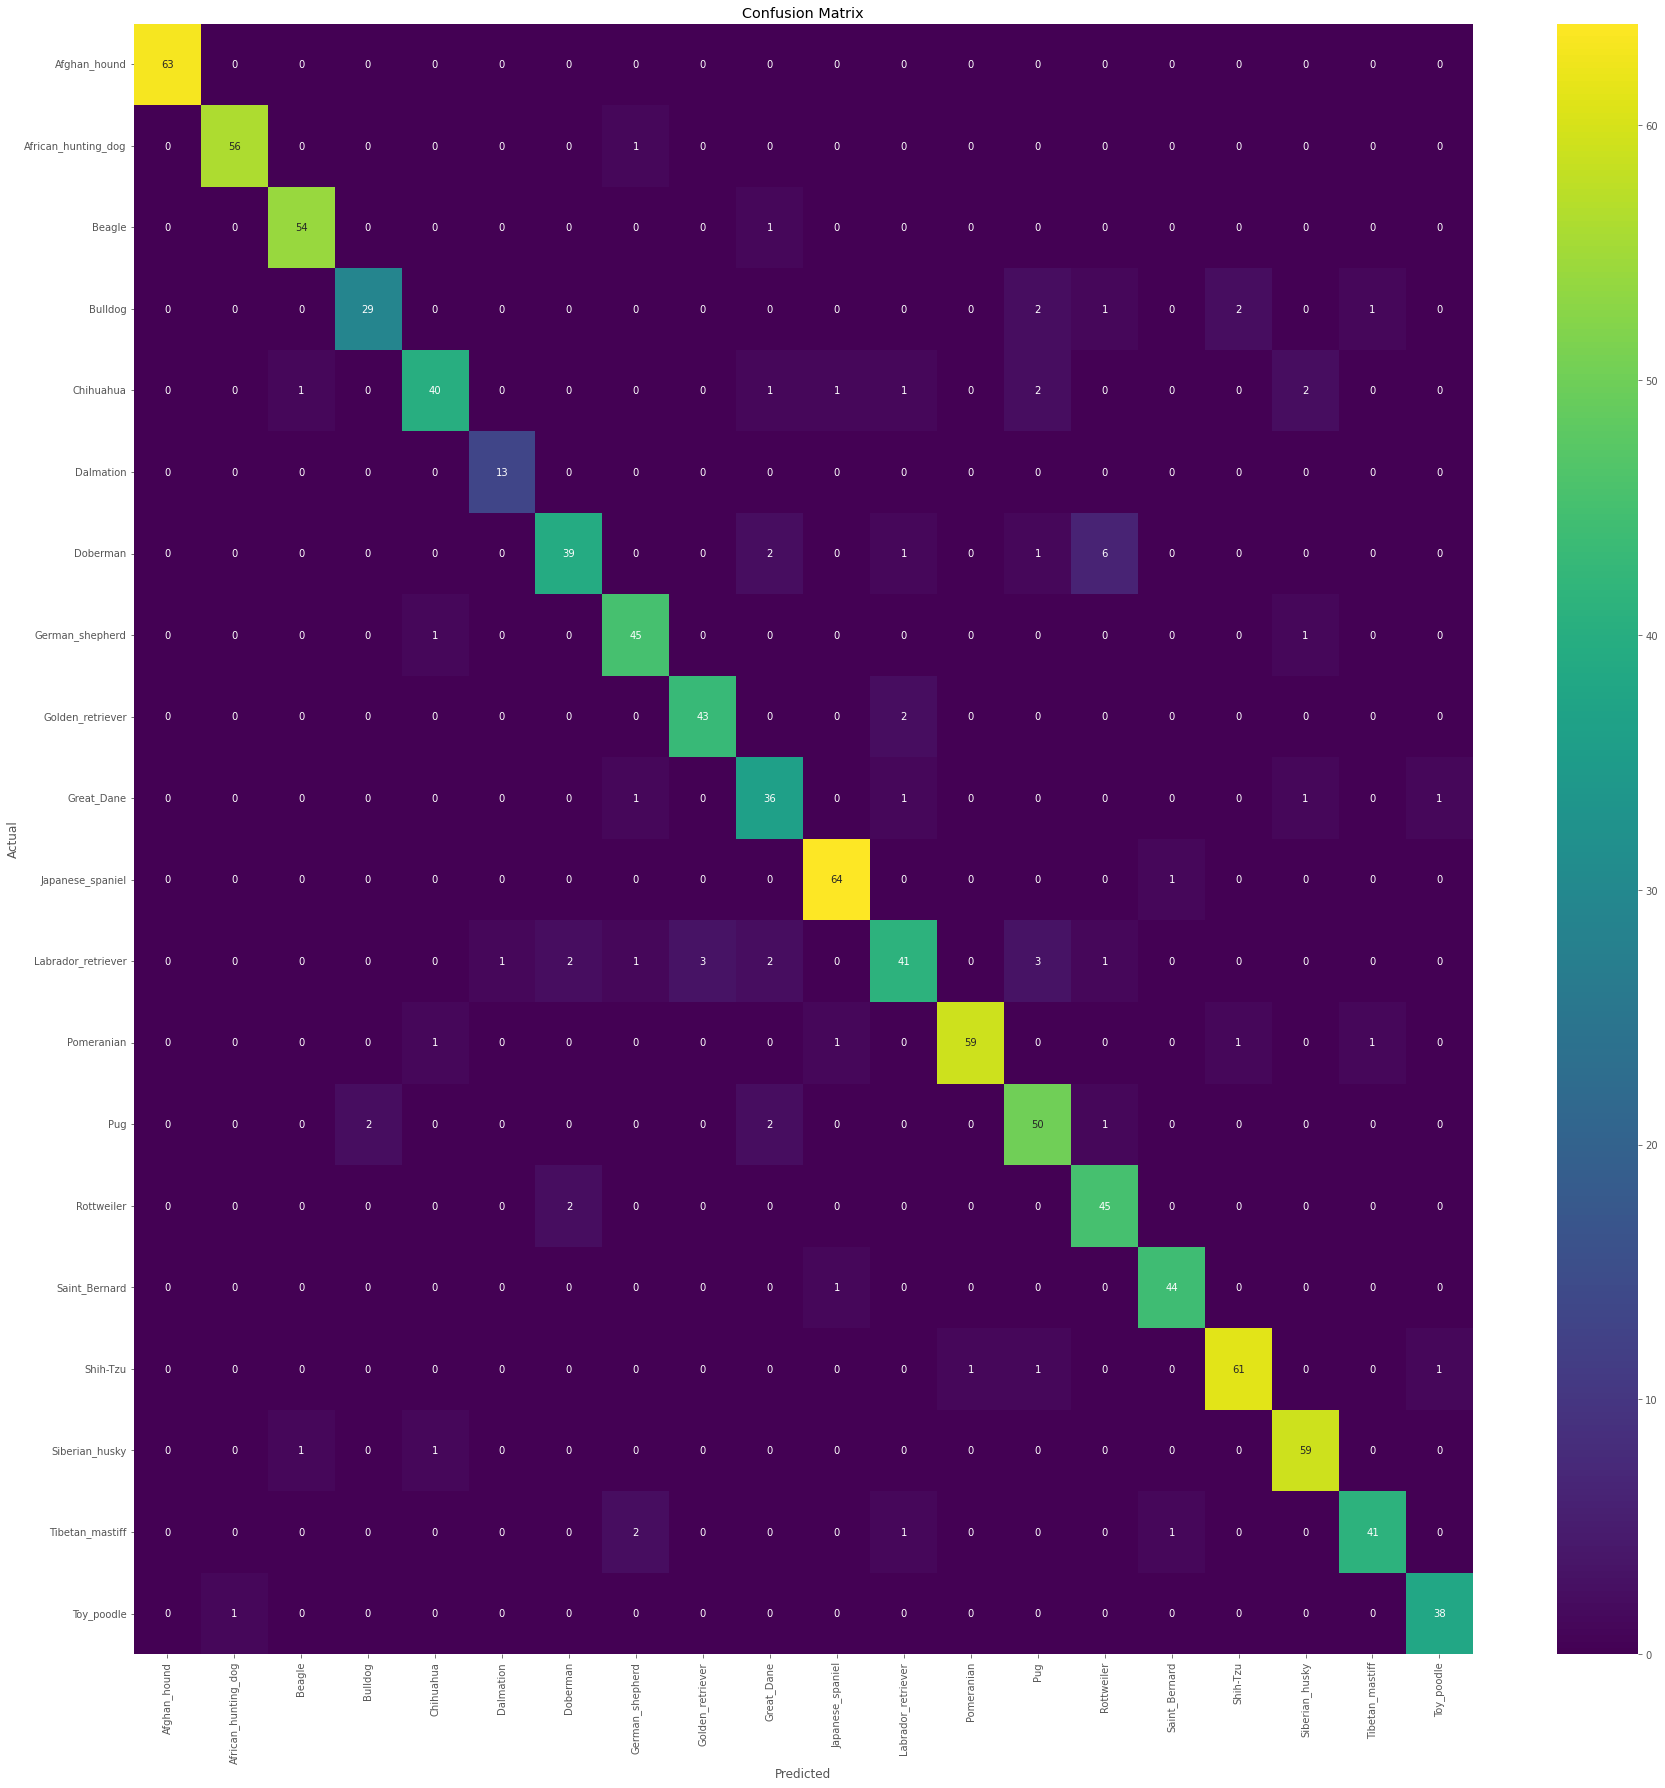

In [52]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.xticks(ticks=np.arange(20) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(20) + 0.5, labels=test_images.class_indices, rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fig.savefig("Confusion Matrix",dpi=700)

In [24]:
print("Classification Report:\n", report)

Classification Report:
                      precision    recall  f1-score   support

       Afghan_hound       1.00      1.00      1.00        63
African_hunting_dog       0.98      0.98      0.98        57
             Beagle       0.96      0.98      0.97        55
            Bulldog       0.94      0.83      0.88        35
          Chihuahua       0.93      0.83      0.88        48
          Dalmation       0.93      1.00      0.96        13
           Doberman       0.91      0.80      0.85        49
    German_shepherd       0.90      0.96      0.93        47
   Golden_retriever       0.93      0.96      0.95        45
         Great_Dane       0.82      0.90      0.86        40
   Japanese_spaniel       0.96      0.98      0.97        65
 Labrador_retriever       0.87      0.76      0.81        54
         Pomeranian       0.98      0.94      0.96        63
                Pug       0.85      0.91      0.88        55
         Rottweiler       0.83      0.96      0.89        47

In [40]:
data_his = pd.DataFrame(history.history)
data_his

loss  accuracy  val_loss  val_accuracy
0   1.179876  0.685436  0.427588      0.900217
1   0.205854  0.946941  0.393370      0.880694
2   0.091071  0.974553  0.330645      0.921909
3   0.041267  0.994044  0.276553      0.917570
4   0.020020  0.998917  0.340970      0.911063
5   0.010614  1.000000  0.279802      0.919740
6   0.006295  1.000000  0.275961      0.924078
7   0.004849  1.000000  0.288429      0.917570
8   0.003749  1.000000  0.273709      0.926247
9   0.003136  1.000000  0.272323      0.928416
10  0.002657  1.000000  0.276826      0.924078
11  0.002286  1.000000  0.280154      0.924078
12  0.001964  1.000000  0.276293      0.926247

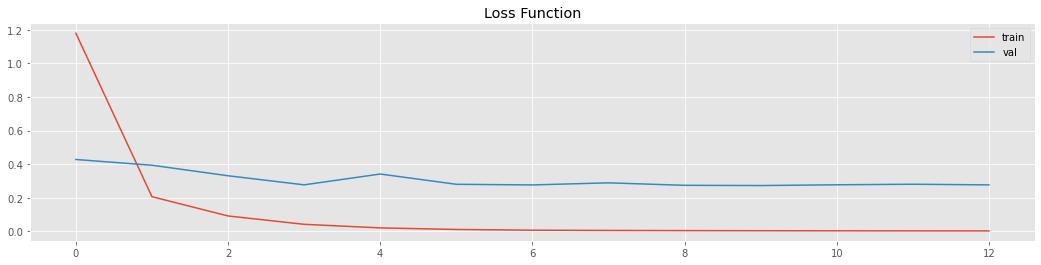

In [53]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

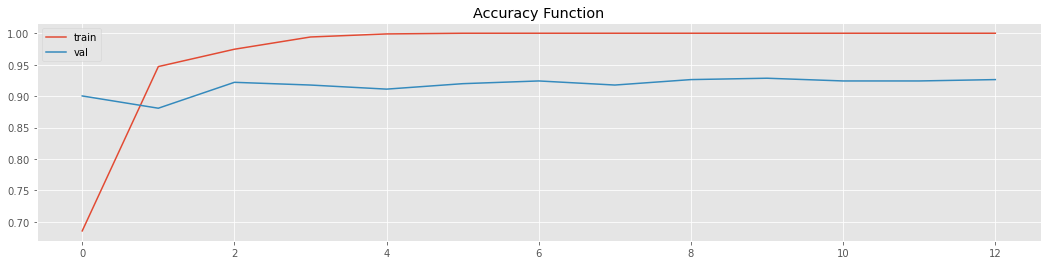

In [54]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)

In [25]:
train_images.class_indices.keys()

dict_keys(['Afghan_hound', 'African_hunting_dog', 'Beagle', 'Bulldog', 'Chihuahua', 'Dalmation', 'Doberman', 'German_shepherd', 'Golden_retriever', 'Great_Dane', 'Japanese_spaniel', 'Labrador_retriever', 'Pomeranian', 'Pug', 'Rottweiler', 'Saint_Bernard', 'Shih-Tzu', 'Siberian_husky', 'Tibetan_mastiff', 'Toy_poodle'])

In [26]:
train_images.class_indices.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [27]:
df=pd.DataFrame({'names':list(train_images.class_indices.keys()),
                 'index':list(train_images.class_indices.values())})

In [29]:
df.iloc[0]['names']

'Afghan_hound'

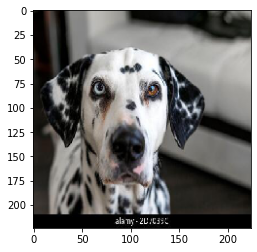

5    Dalmation
Name: names, dtype: object


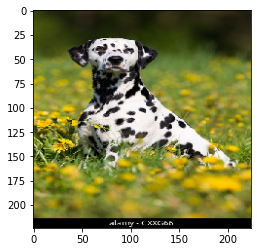

5    Dalmation
Name: names, dtype: object


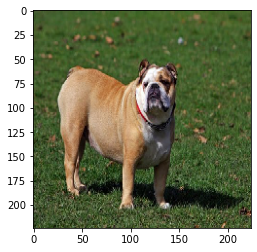

3    Bulldog
Name: names, dtype: object


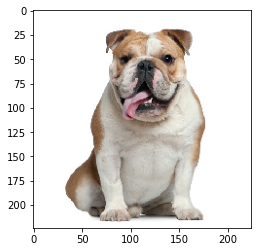

3    Bulldog
Name: names, dtype: object


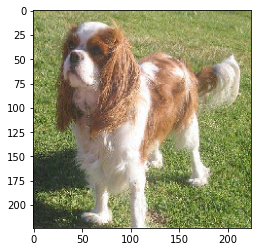

16    Shih-Tzu
Name: names, dtype: object


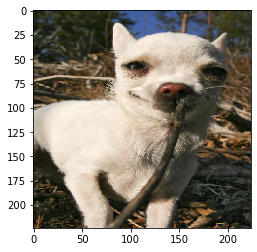

4    Chihuahua
Name: names, dtype: object


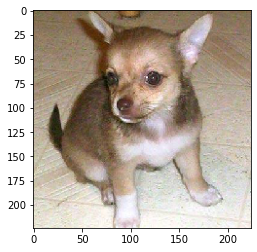

4    Chihuahua
Name: names, dtype: object


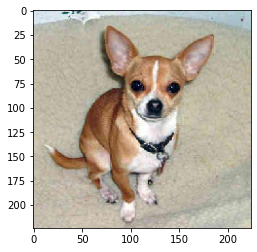

4    Chihuahua
Name: names, dtype: object


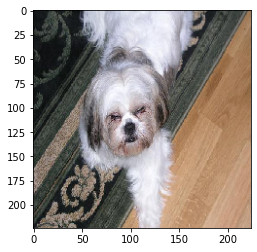

16    Shih-Tzu
Name: names, dtype: object


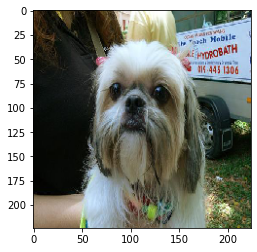

16    Shih-Tzu
Name: names, dtype: object


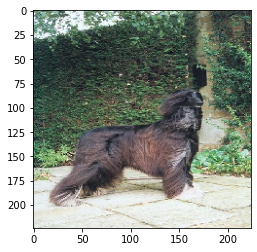

0    Afghan_hound
Name: names, dtype: object


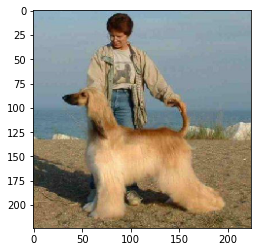

0    Afghan_hound
Name: names, dtype: object


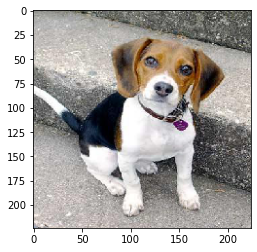

2    Beagle
Name: names, dtype: object


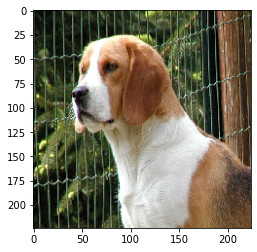

11    Labrador_retriever
Name: names, dtype: object


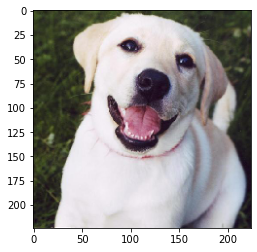

11    Labrador_retriever
Name: names, dtype: object


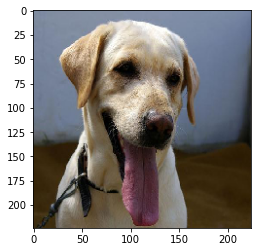

11    Labrador_retriever
Name: names, dtype: object


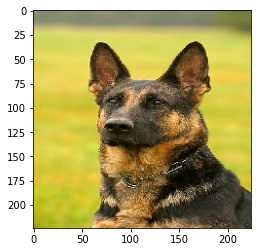

4    Chihuahua
Name: names, dtype: object


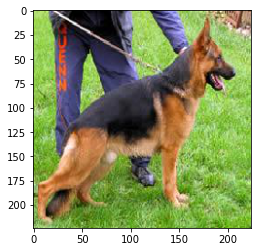

17    Siberian_husky
Name: names, dtype: object


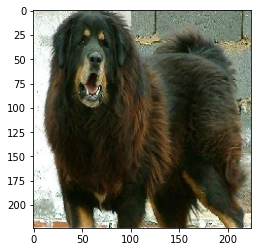

18    Tibetan_mastiff
Name: names, dtype: object


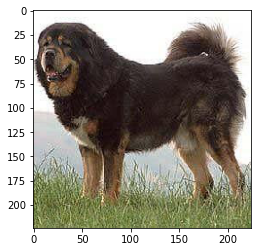

18    Tibetan_mastiff
Name: names, dtype: object


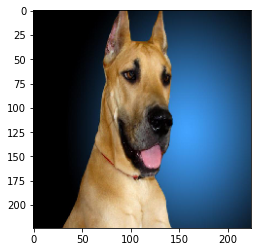

9    Great_Dane
Name: names, dtype: object


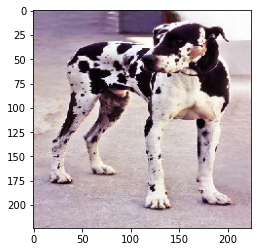

5    Dalmation
Name: names, dtype: object


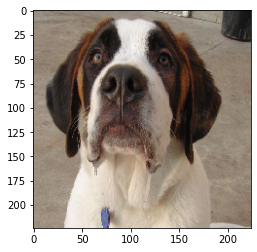

15    Saint_Bernard
Name: names, dtype: object


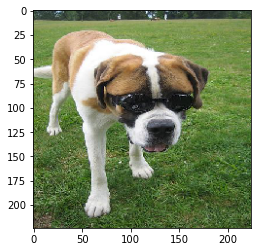

3    Bulldog
Name: names, dtype: object


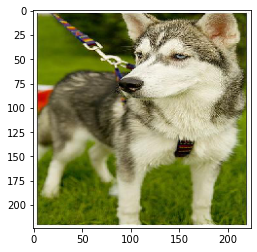

17    Siberian_husky
Name: names, dtype: object


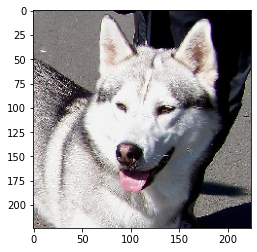

17    Siberian_husky
Name: names, dtype: object


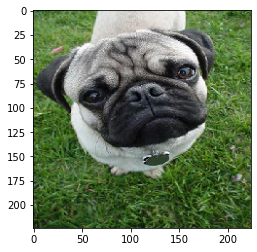

13    Pug
Name: names, dtype: object


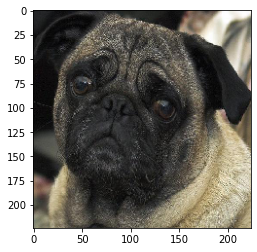

13    Pug
Name: names, dtype: object


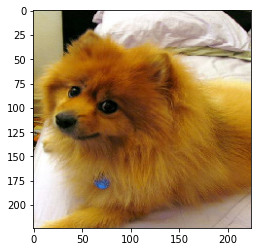

12    Pomeranian
Name: names, dtype: object


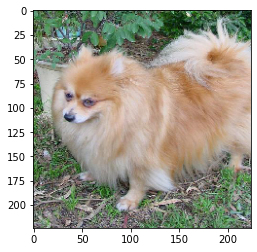

12    Pomeranian
Name: names, dtype: object


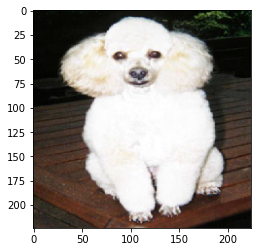

19    Toy_poodle
Name: names, dtype: object


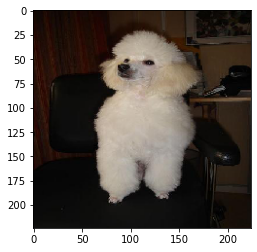

19    Toy_poodle
Name: names, dtype: object


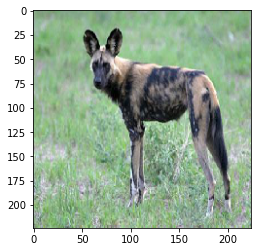

1    African_hunting_dog
Name: names, dtype: object


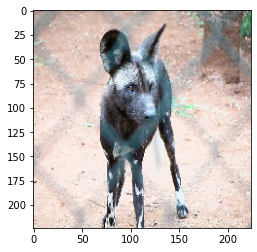

1    African_hunting_dog
Name: names, dtype: object


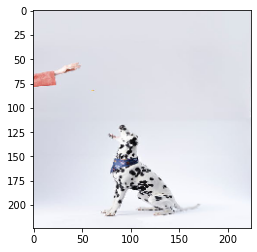

5    Dalmation
Name: names, dtype: object


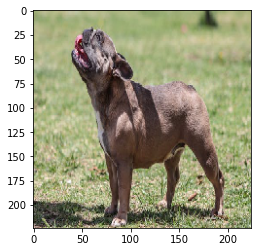

13    Pug
Name: names, dtype: object


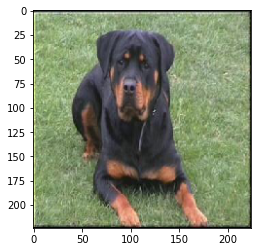

11    Labrador_retriever
Name: names, dtype: object


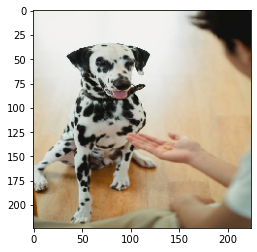

5    Dalmation
Name: names, dtype: object


In [30]:
from tensorflow.keras.preprocessing import image
dir_path = 'C:/Users/hrishikesh/Desktop/deepdog/test/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    predictions = np.argmax(model.predict(images), axis=1)
    print(df.iloc[predictions]['names'])

In [31]:
model.save("dogmodel.h5")